In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import plotting
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [68]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [70]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [71]:
# drop unnamed column
data = data.drop('Unnamed: 32',axis=1)

# Exploratory Data Analysis
## Distribution

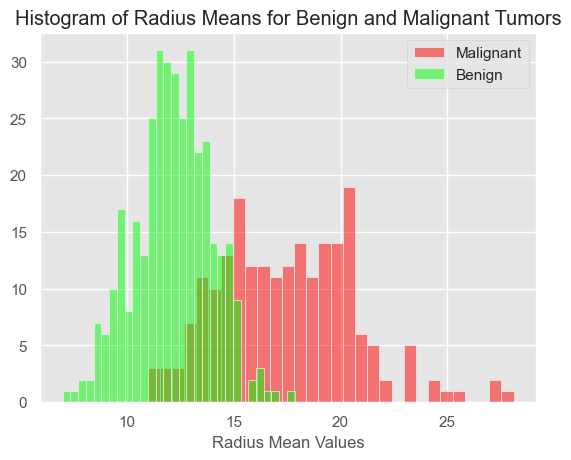

Most frequent malignant radius mean is: 20.102


In [72]:
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,
                  bins=30,
                  fc=(1,0,0,0.5),
                  label = "Malignant")

b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,
                  bins=30,
                  fc=(0,1,0,0.5),
                  label = "Benign")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.title("Histogram of Radius Means for Benign and Malignant Tumors")
plt.show()

idx_freq_m_r_mean = np.argmax(m[0])
most_freq_m_r_mean = m[1][idx_freq_m_r_mean]
print(f"Most frequent malignant radius mean is: {np.round(most_freq_m_r_mean,3)}")

### Observation:
- Malignant tumors tend to have higher radius means
- The distribution of benign tumors is slightly more normally distributed
- Outliers in benign distribution as well as malignant 

### Let's calculate the outliers
- IQR = Q3-Q1
- Low outliers = Q1 - 1.5*IQR
- High outliers = Q3 + 1.5*IQR

In [73]:
data_b = data[data['diagnosis'] == 'B']
data_m = data[data['diagnosis'] == 'M']
desc = data_b.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", np.round(lower_bound,3), ", ", np.round(upper_bound,3), ")")

print("Outliers:", data_b[(data_b.radius_mean < lower_bound) | (data_b.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645 ,  16.805 )
Outliers: [ 6.981 16.84  17.85 ]


### Plot box plot with outliers

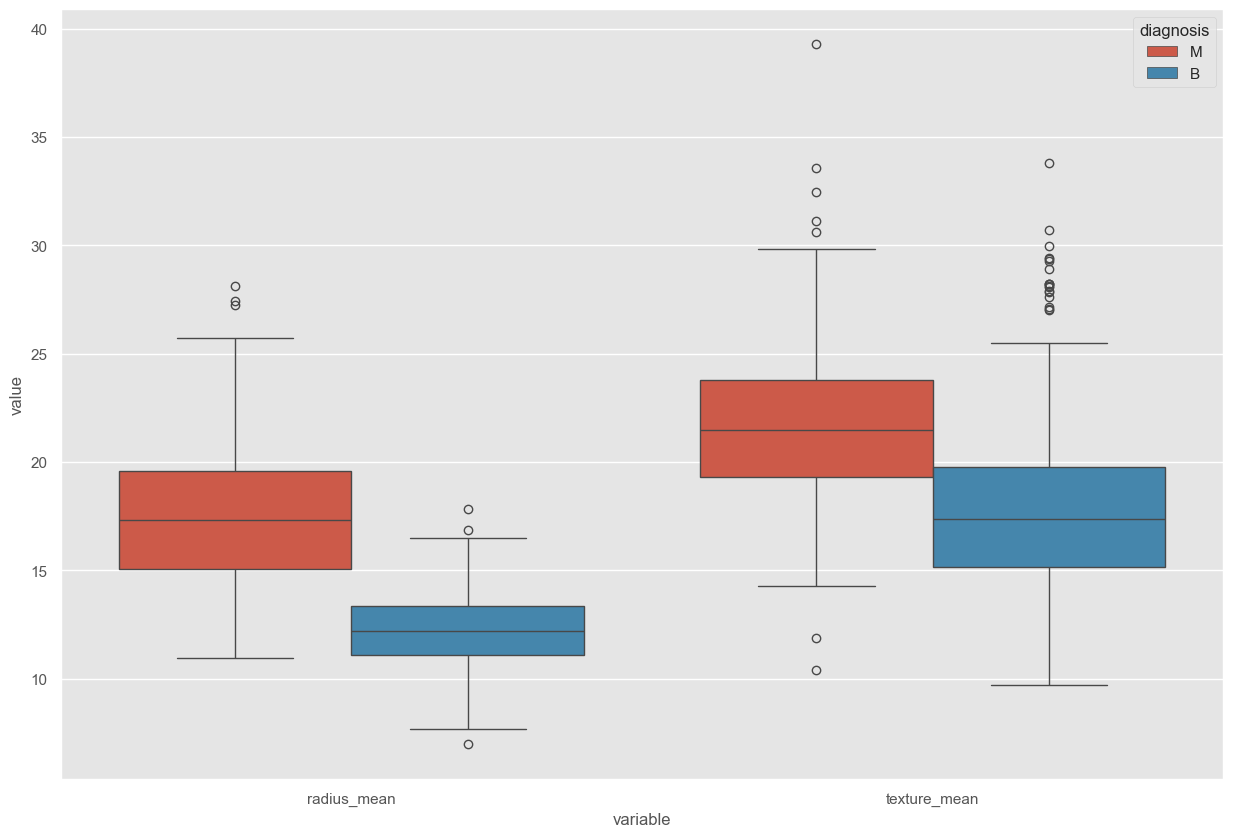

In [74]:
melted_data = pd.melt(data,id_vars = "diagnosis",
                      value_vars = ['radius_mean',
                                    'texture_mean',
                      ])

plt.figure(figsize = (15,10))
sns.boxplot(x = 'variable', 
            y = 'value',
            hue = 'diagnosis',
            data = melted_data) 
plt.show()

### Summary statistics
- Mean
- Variance
- Standard deviation (square root of variance)

In [75]:
print("Mean: ", data_b.radius_mean.mean())
print("Variance: ", data_b.radius_mean.var())
print("Standard Deviation (std): ", data_b.radius_mean.std())
print("Median: ", data_b.radius_mean.median())
print("Skewness: ", data_b.radius_mean.skew())
print("Kurtosis: ", data_b.radius_mean.kurt())
print("Mode: ", stats.mode(data_b.radius_mean))
print("Describe:\n ", data_b.radius_mean.describe())

Mean:  12.146523809523808
Variance:  3.1702217220438738
Standard Deviation (std):  1.7805116461410393
Median:  12.2
Skewness:  -0.08379911084596788
Kurtosis:  -0.012283134459814882
Mode:  ModeResult(mode=10.26, count=3)
Describe:
  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


### Cumulative distribution function (CDF)
- CDF(x) = P(X <= x)
- Cumulative distribution function is the probability that a random variable X takes a value less than or equal to x

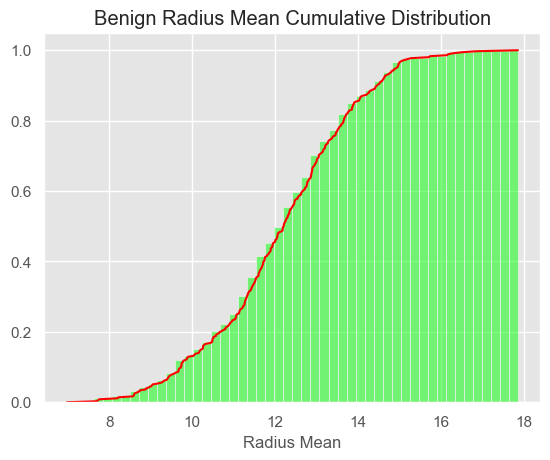

In [76]:
plt.hist(data_b.radius_mean,
         bins = 50,
         fc = (0,1,0,0.5),
         label = "Benign",
         density = True,
         cumulative = True)
sorted_b = np.sort(data_b.radius_mean)
y = np.arange(len(sorted_b))/float(len(sorted_b)-1)

plt.plot(sorted_b,y,color = "red")
plt.title("Benign Radius Mean Cumulative Distribution")
plt.xlabel("Radius Mean")
plt.show()

### Effect size
- Effect size is the difference between the mean of the variable in the treatment group and the mean of the variable in the control group.
- It is a simple way of quantifying the difference between two groups of data.
- Use cohen's d to measure effect size.
- Cohen suggests that if d(effect_size)=0.2, it i a small effect size, if d(effect_size)=0.5, it is a medium effect size, and if d(effect_size)=0.8, it is a large effect size.

In [77]:
mean_diff = data_m.radius_mean.mean() - data_b.radius_mean.mean()
var_b = data_b.radius_mean.var()
var_m = data_m.radius_mean.var()
var_pooled = (len(data_b)*var_b + len(data_m)*var_m)/float(len(data_b) + len(data_m))

effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ", np.round(effect_size,3))

Effect size:  2.205


The effect size of 2.2 indicates that the two groups are different from each other as we expect.

### Relationship between variables
- We say that two variables are related to each other if one gives information about the other.
- For example, price and distance; if you take a long taxi trip you will pay more. Therefore price and distance are positively related.

- A scatter plot is a simple way to visualize the relationship between two variables.
- Let's compare mean radius and mean area

<Figure size 1500x1000 with 0 Axes>

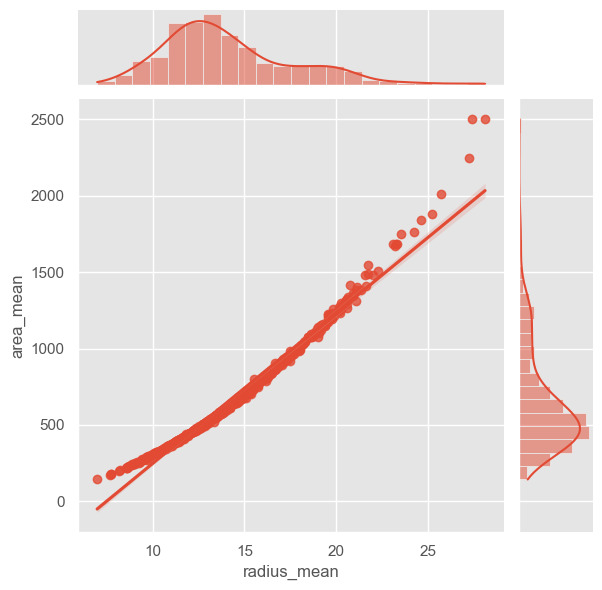

In [78]:
plt.figure(figsize=(15,10))
sns.jointplot(x=data.radius_mean, y=data.area_mean, kind="reg")
plt.show()

- We can see that the two variables are positively correlated.

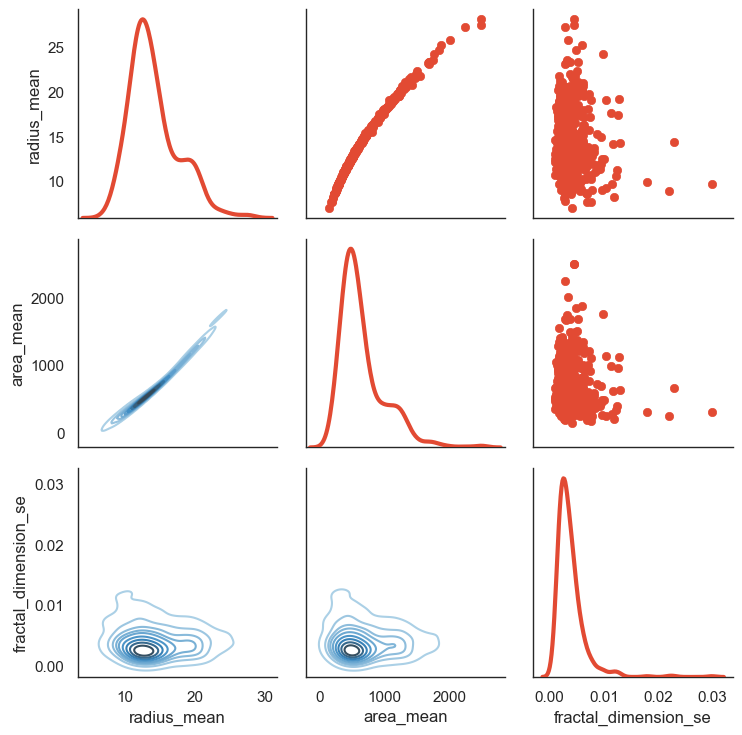

In [79]:
# Let's also look at fractal dimension
sns.set_style("white")
df= data.loc[:,['radius_mean','area_mean','fractal_dimension_se']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

There is no correlation between area mean and fractal dimension se. Because when area mean changes, fractal dimension se is not affected.

### Correlation
- Represents the strength of the relationship between two variables
- Let's look at correlation between all features

In [85]:
# Change M and B to 1 and 0
data[data == 'M'] = 1
data[data == 'B'] = 0
# ignore id column
data = data.drop('id',axis=1)

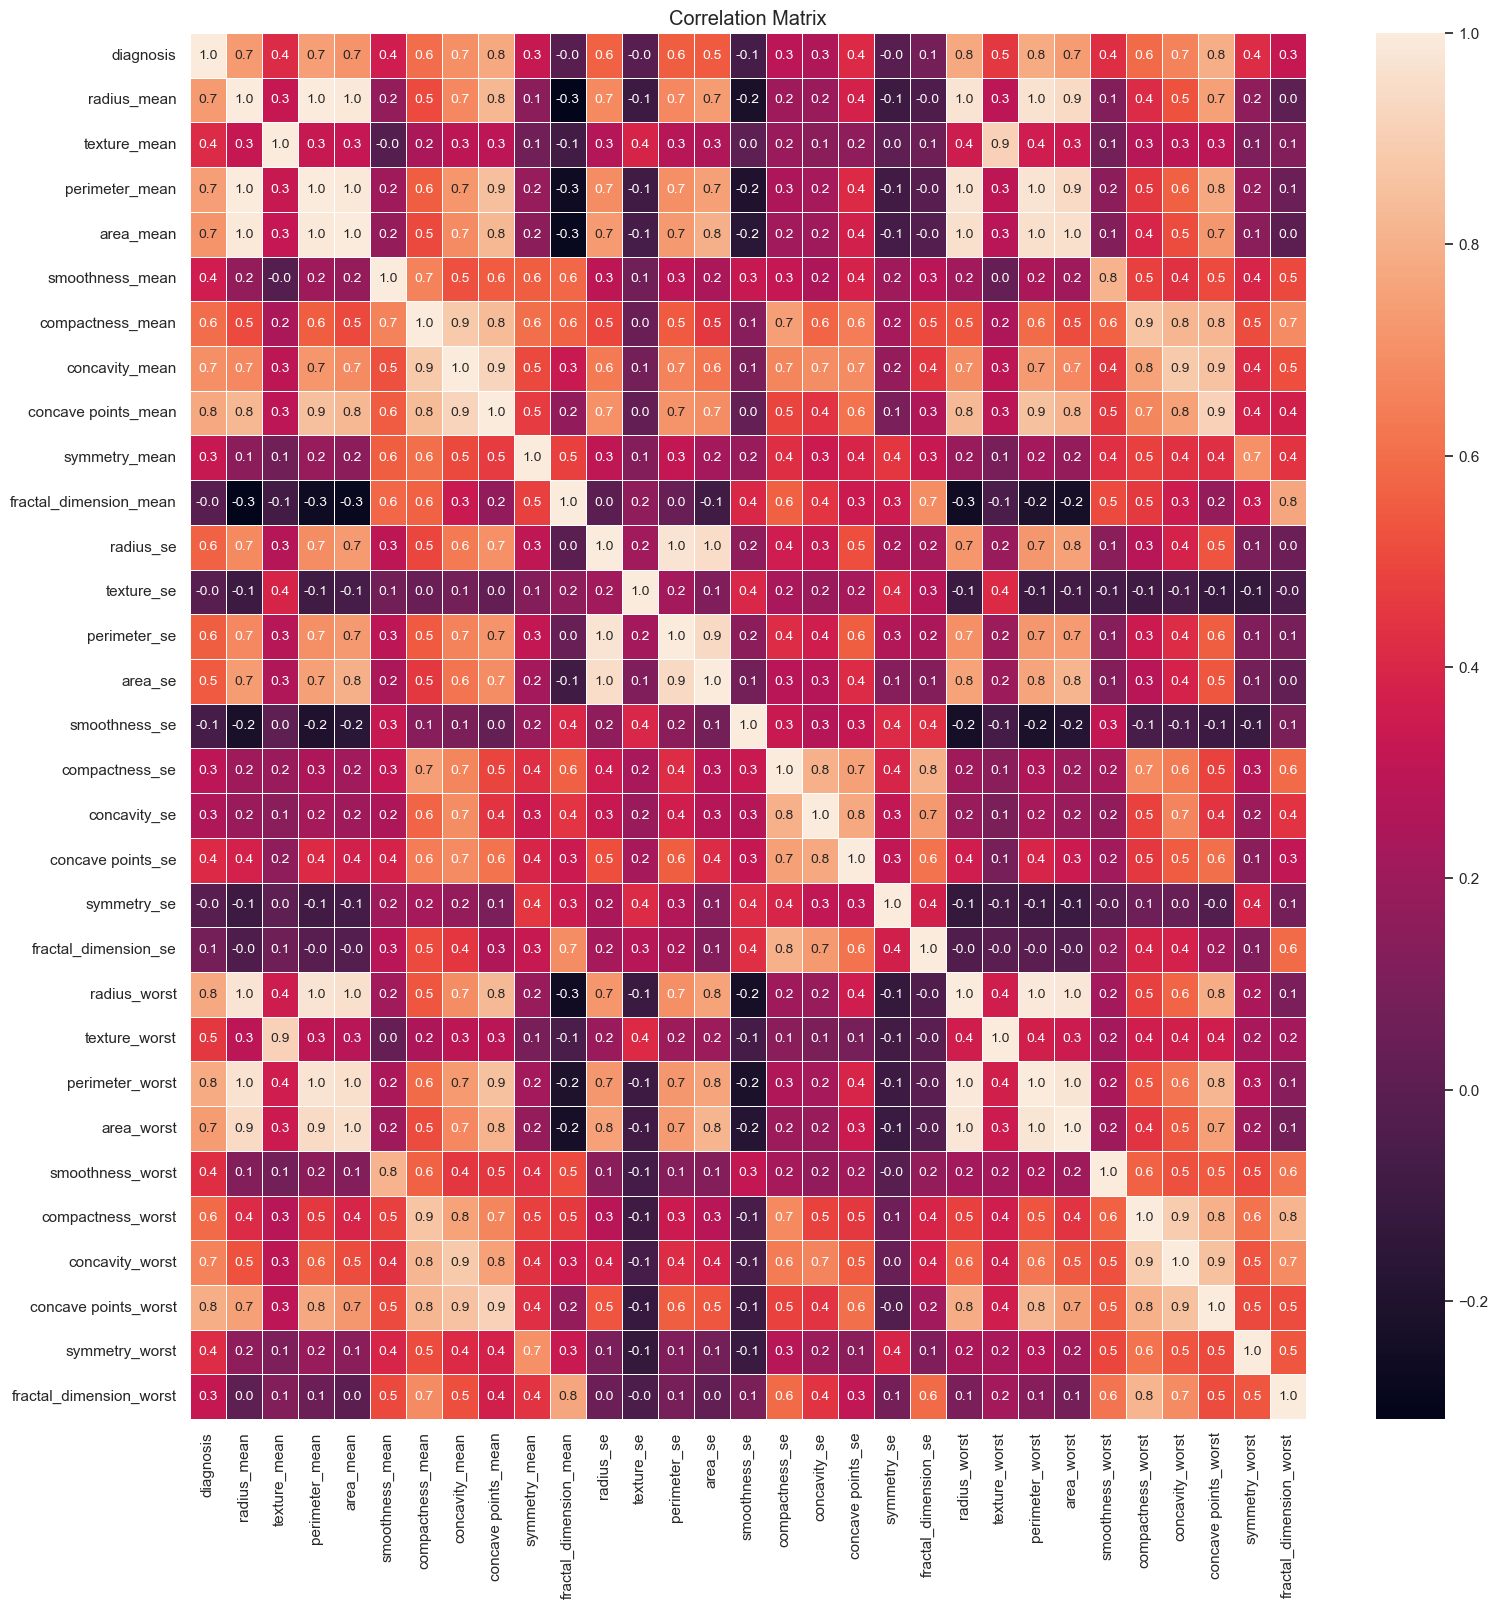

In [86]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=0.5,
            fmt=".1f",
            ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png")
plt.show()

### Covariance
- Measures the tendency of two variables to change together
- Covariance is maximized if two vectors are identical
- Covariance is zero if they are orthogonal
- Covariance is negative if they change in opposite directions

In [87]:
np.cov(data.radius_mean, data.area_mean)
print("Covariance between radius mean and area mean: ", data.radius_mean.cov(data.area_mean))
print("Covariance between radius mean and fractal dimension: ", data.radius_mean.cov(data.fractal_dimension_se))


Covariance between radius mean and area mean:  1224.483409346457
Covariance between radius mean and fractal dimension:  -0.00039762485764406293


### Pearson Correlation
- Covariance divided by standard deviation
- Let's compute it with both. pd.corr() and the definition
- Radius mean and Area mean should be very positively correlated

In [91]:
p1 = data.loc[:,['radius_mean','area_mean']].corr(method='pearson')
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print("Pearson correlation built-in:\n", p1)
print("Pearson correlation by hand: ", p2)

Pearson correlation built-in:
              radius_mean  area_mean
radius_mean     1.000000   0.987357
area_mean       0.987357   1.000000
Pearson correlation by hand:  0.9873571700566126


### Spearman's Rank Correlation
- Pearson's correlation works well if the relationship is linear and the variables are roughly normally distributed. But outliers can make Pearson's correlation less accurate.
- To compute Spearman's Rank Correlation, we compute the rank of each value

In [90]:
ranked_data = data.rank()
spearman_corr = ranked_data.loc[:,['radius_mean','area_mean']].corr(method='pearson')   
print("Spearman correlation:\n", spearman_corr)

Spearman correlation:
              radius_mean  area_mean
radius_mean     1.000000   0.999602
area_mean       0.999602   1.000000


### Observation:
- Spearman's is slightly higher than Pearson's, potentially due to non-linear relationships or the presence of outliers.

### Hypothesis Testing
- Null Hypothesis: There is no relationship between radius mean and area mean in the breast cancer tumor population

In [94]:
statistic, p_value = stats.ttest_rel(data.radius_mean, data.area_mean)
print("P-value: ", p_value)

P-value:  1.5253492492559045e-184


The p-value is almost zero, we can reject the null hypothesis.

### Normal distributions and z-scores
*Example IQ data, for better visualization*

Mean:  110.04814084013526
Standard Deviation:  19.949938415853556


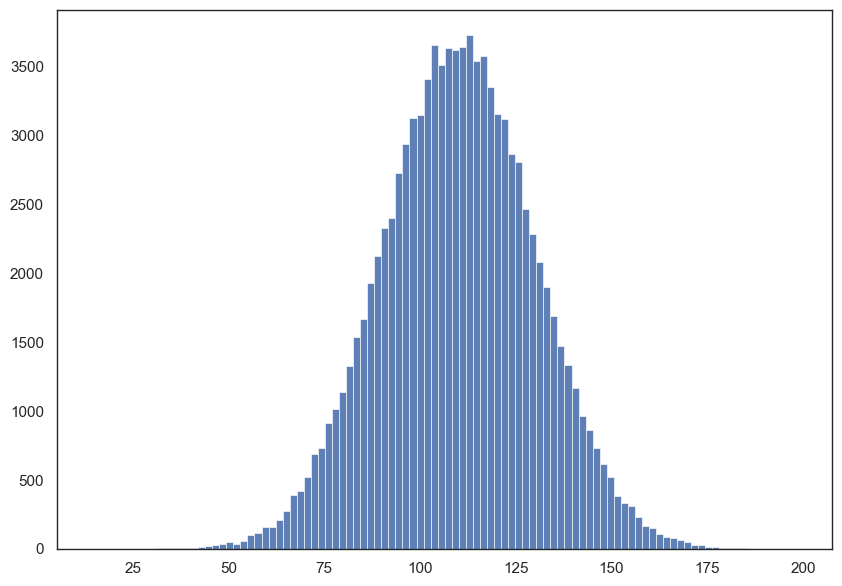

In [127]:
# parameters for normal distribution
mu, sigma = 110, 20 # mean and standard deviation
n_samples = 100000
s = np.random.normal(mu, sigma, size=n_samples)
print("Mean: ", np.mean(s))
print("Standard Deviation: ", np.std(s))

# Visualize
plt.figure(figsize=(10,7))
plt.hist(s, bins=100, density=False,  alpha=0.9, color='b')
plt.show()

### Observation:
- The average IQ is 110 with a standard deviation of 20. We can see that the distribution is normal.
- Now, let's explore what percentage of people have an IQ score between 80 and 140.
- Z-score is a useful tool for this

In [128]:
# Z-score
z = (s - np.mean(s))/np.std(s)

# IQ bounds of interest
low_IQ = 80
high_IQ = 140

z1 = (low_IQ-np.mean(s))/np.std(s)
z2 = (high_IQ - np.mean(s))/np.std(s)

print(f"z1 = {z1}, z2 = {z2}")

z1 = -1.5061771226450003, z2 = 1.501350958360001


Observation: 
- z1 and z2 are -1.5 and 1.5, respectively.
- If we look at the z-table below, z=1.5 corresponds to area=0.4332

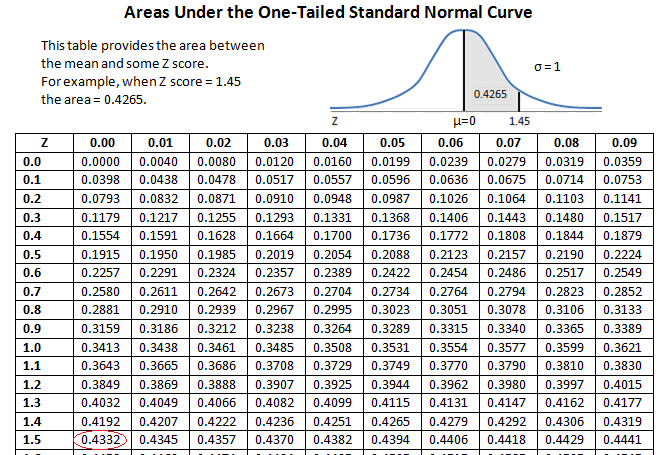

In [129]:
# Double the resulting area to get the percentage over the entire range from 80 to 140
z_area = 0.4332
percentage = z_area * 2 * 100
print(f"{percentage}% of people have an IQ score between 80 and 140.")

86.64% of people have an IQ score between 80 and 140.


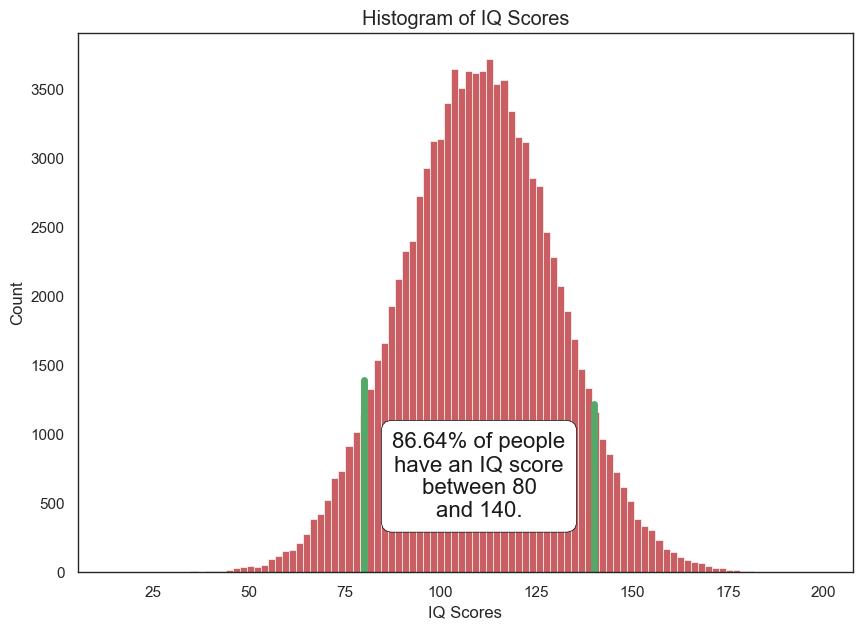

In [237]:
# Now, let's add that to the plot

# Visualize
plt.figure(figsize=(10,7))

h = plt.hist(s, bins=100, density=False,  alpha=0.9, color='r')
# Get the index of the IQ bounds
low_IQ_idx = np.argwhere(np.floor(h[1]) == 80) or np.argwhere(np.ceil(h[1]) == 80)
high_IQ_idx = np.argwhere(np.floor(h[1]) == 140) or np.argwhere(np.ceil(h[1]) == 140)

# Get the histogram ymax at the IQ bounds
hist_max = np.max(h[0])
low_IQ_ymax = (h[0][low_IQ_idx[0][0]])/hist_max
high_IQ_ymax = (h[0][high_IQ_idx[0][0]])/hist_max

plt.axvline(x=low_IQ, ymax=low_IQ_ymax,
            linewidth=5, 
            color='g')
plt.axvline(x=high_IQ, ymax=high_IQ_ymax,
            linewidth=5, 
            color='g')
# Add label for percentage of people with IQ between 80 and 140 in 
# the center of the plot
plt.text(np.mean(s), 400,
         f"{percentage}% of people\nhave an IQ score\nbetween {low_IQ}\nand {high_IQ}.", 
         fontsize=16, 
         color='k',
         ha='center',
         bbox=dict(facecolor='white',
                   edgecolor='black',
                   boxstyle='round,pad=0.5'))

plt.title("Histogram of IQ Scores")
plt.xlabel("IQ Scores")
plt.ylabel("Count")
plt.show()